In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

import warnings
warnings.filterwarnings('ignore')
from mpltools import style
style.use('ggplot')

<h2>Counting Errors</h2>
<p>Matplotlib does not naturally allow for histograms to have error bars, which is incredibly frusterating.  There are a few ways of dealing with this: <br/>
1.) Manually Calculate and overlay error bars. <br/>
2.) Use a different plotting package. <br/>
I

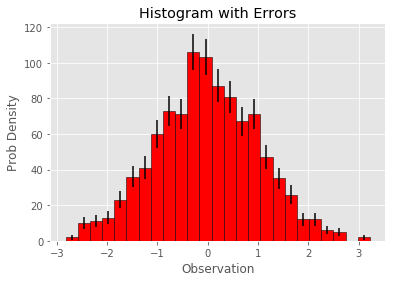

In [2]:
#create histogram object, bins, and error bars
data       = np.random.normal(0, 1, size=1000)
occ, bins  = np.histogram(data, bins=25)
bincenters = 0.5*(bins[1:]+bins[:-1])
menStd     = np.sqrt(occ)
width = [bins[i+1]-bins[i] for i in range(len(bins)-1)]

#create bar plot
fig, ax = plt.subplots(1, 1)
ax.bar(bincenters, occ, width=width, color='r', yerr=menStd, edgecolor='black')
ax.set_title("Histogram with Errors")
ax.set_ylabel("Prob Density")
ax.set_xlabel("Observation")
ax.legend(loc='upper right')
plt.show()

<h2>Central Limit Theorem</h2>
<p>Suppose we have the following sample showing the spending patterns of visitors to a particular website</p>

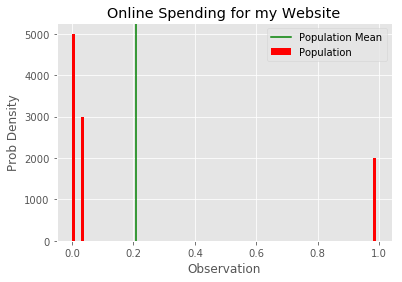

In [42]:
spending = np.array([0]*5000 + [.03]*3000 + [.99]*2000)
mu = np.mean(spending)
fig, ax = plt.subplots(1, 1)
ax.hist(spending, bins=100, color='red', label='Population')
ax.axvline(mu, color='green', label='Population Mean')
ax.set_title("Online Spending for my Website")
ax.set_ylabel("Prob Density")
ax.set_xlabel("Observation")
ax.legend(loc='upper right')
plt.show()

In [43]:
sample = np.random.choice(spending, size=30, replace=False)
sample_mean = np.mean(sample)
sample_var = np.var(sample)
print(sample_mean, sample_var)

0.142 0.110816


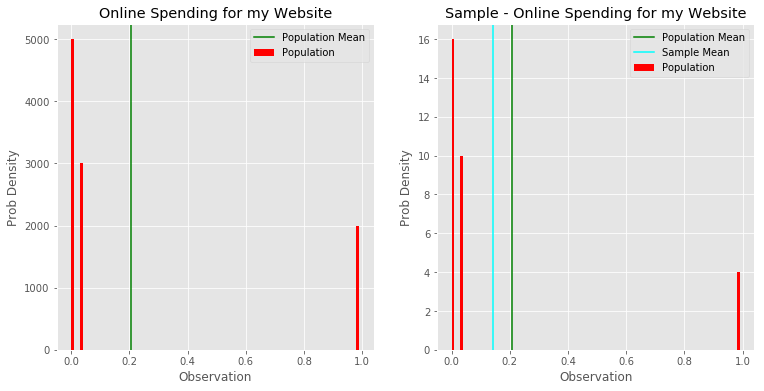

In [44]:
fig, ax = plt.subplots(1, 2)
fig.set_size_inches(12.5, 6)
ax[0].hist(spending, bins=100, color='red', label='Population')
ax[0].axvline(mu, color='green', label='Population Mean')
ax[0].set_title("Online Spending for my Website")
ax[0].set_ylabel("Prob Density")
ax[0].set_xlabel("Observation")
ax[0].legend(loc='upper right')

ax[1].hist(sample, bins=100, color='red', label='Population')
ax[1].axvline(mu, color='green', label='Population Mean')
ax[1].axvline(sample_mean, color='cyan', label='Sample Mean')
ax[1].set_title("Sample - Online Spending for my Website")
ax[1].set_ylabel("Prob Density")
ax[1].set_xlabel("Observation")
ax[1].legend(loc='upper right')
plt.show()

For 20 samples we have a mean=0.2076 and a std=0.0743
For 160 samples we have a mean=0.2032 and a std=0.0697
For 1280 samples we have a mean=0.2062 and a std=0.0714


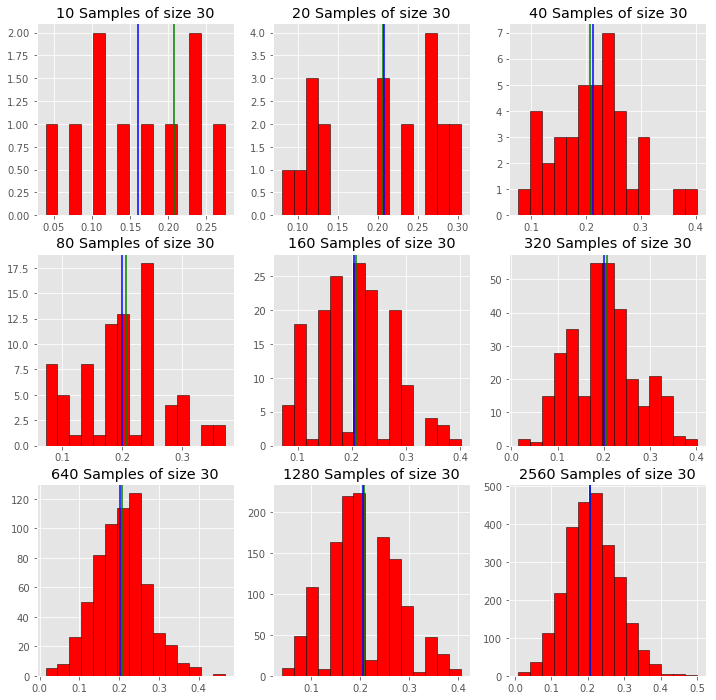

In [45]:
from itertools import product
fig, ax = plt.subplots(3, 3)
fig.set_size_inches(12, 12)
size = 30
for i, j in product([0, 1, 2], [0, 1, 2]):
    n_samples = 10*pow(2,3*i+j)
    s_vals = [np.mean(np.random.choice(spending, size=size, replace=False)) for s in range(n_samples)]
    s_ave = np.mean(s_vals)
    ax[i][j].hist(s_vals, bins=15, color='red', edgecolor='black', label='Sampling Data')
    ax[i][j].axvline(mu, color='green', label='Population Mean')
    ax[i][j].axvline(s_ave, color='blue', label='Sample Mean')
    ax[i][j].set_title("{} Samples of size {}".format(n_samples, size))
    if j%2!=0:
        print("For {0} samples we have a mean={1:.4f} and a std={2:.4f}".format(n_samples, s_ave, np.std(s_vals)))
    
plt.show()

For 20 samples we have a mean=0.1993 and a std=0.0304
For 160 samples we have a mean=0.2076 and a std=0.0402
For 1280 samples we have a mean=0.2081 and a std=0.0387


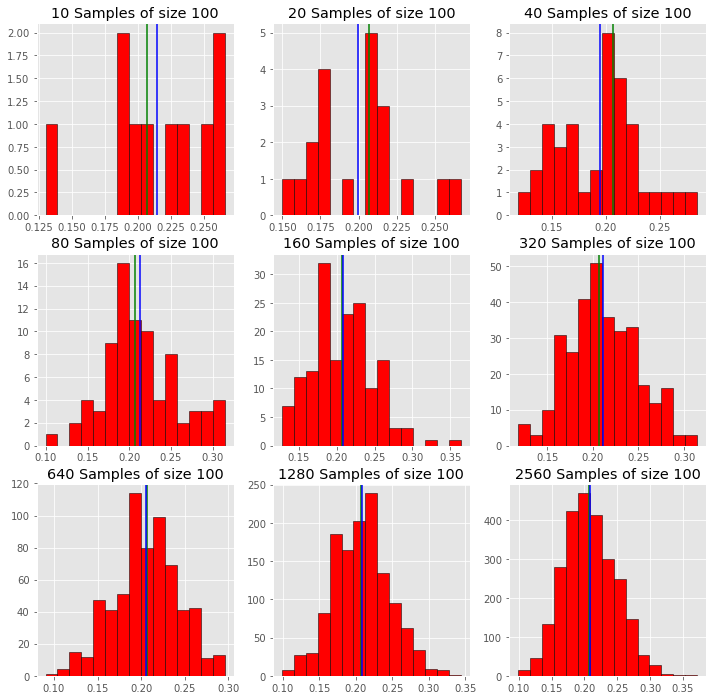

In [46]:
from itertools import product
fig, ax = plt.subplots(3, 3)
fig.set_size_inches(12, 12)
size = 100
for i, j in product([0, 1, 2], [0, 1, 2]):
    n_samples = 10*pow(2,3*i+j)
    s_vals = [np.mean(np.random.choice(spending, size=size, replace=False)) for s in range(n_samples)]
    s_ave = np.mean(s_vals)
    ax[i][j].hist(s_vals, bins=15, color='red', edgecolor='black', label='Sampling Data')
    ax[i][j].axvline(mu, color='green', label='Population Mean')
    ax[i][j].axvline(s_ave, color='blue', label='Sample Mean')
    ax[i][j].set_title("{} Samples of size {}".format(n_samples, size))
    if j%2!=0:
        print("For {0} samples we have a mean={1:.4f} and a std={2:.4f}".format(n_samples, s_ave, np.std(s_vals)))
        
plt.show()

For 20 samples we have a mean=0.2065 and a std=0.0118
For 160 samples we have a mean=0.2073 and a std=0.0160
For 1280 samples we have a mean=0.2063 and a std=0.0172


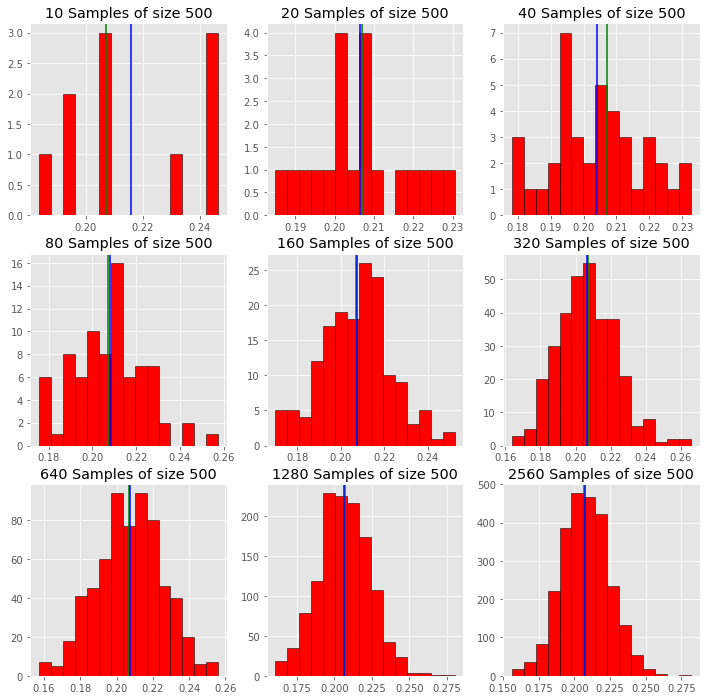

In [47]:
from itertools import product
fig, ax = plt.subplots(3, 3)
fig.set_size_inches(12, 12)
size = 500
for i, j in product([0, 1, 2], [0, 1, 2]):
    n_samples = 10*pow(2,3*i+j)
    s_vals = [np.mean(np.random.choice(spending, size=size, replace=False)) for s in range(n_samples)]
    s_ave = np.mean(s_vals)
    ax[i][j].hist(s_vals, bins=15, color='red', edgecolor='black', label='Sampling Data')
    ax[i][j].axvline(mu, color='green', label='Population Mean')
    ax[i][j].axvline(s_ave, color='blue', label='Sample Mean')
    ax[i][j].set_title("{} Samples of size {}".format(n_samples, size))
    if j%2!=0:
        print("For {0} samples we have a mean={1:.4f} and a std={2:.4f}".format(n_samples, s_ave, np.std(s_vals)))
    
plt.show()

<h2>CLT Error</h2>
<p> One thing you'll notice is that the variance (standard deviation) of the the trails was insensitive to the number of samples aquired, but did vary with the size of the sample.  In general, for sufficiently large number of samples, we can say:<br/>
$$\overline{X}=\mu$$<br/>
$$\overline{s}=\frac{\sigma}{\sqrt{n}}$$
</p>

<h2>Confidence Intervals</h2>

94 6


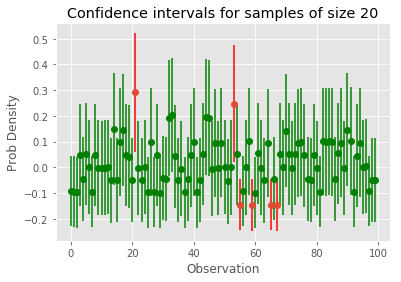

In [51]:
samples = []

size = 20
aoc = 2.093
#verify -> 2*(1 - stats.t.cdf(2.045, df = size-1))
for i in range(100):
    sample = np.random.choice(spending, size=size, replace=False)
    s_m = np.mean(sample)-mu
    s_e = aoc*np.sqrt(np.var(sample)/size)
    s_c = 'green' if s_m+s_e>0 and s_m-s_e<0 else 'red'
    samples.append([i, s_m, s_e, s_c])

    
samples0 = np.array([x for x in samples if x[3]=='green'])
samples1 = np.array([x for x in samples if x[3]=='red'])
print(len(samples0), len(samples1))

fig, ax = plt.subplots(1, 1)
ax.errorbar(samples0[:,0].astype('float'), samples0[:,1].astype('float'), yerr=samples0[:,2].astype('float'), fmt='o', color='green', ecolor='green')
ax.errorbar(samples1[:,0].astype('float'), samples1[:,1].astype('float'), yerr=samples1[:,2].astype('float'), fmt='o', ecolor='red')
ax.set_title("Confidence intervals for samples of size {}".format(size))
ax.set_ylabel("")
ax.set_xlabel("Observation")
ax.legend(loc='upper right')
plt.show()

<h2>T-Distribution</h2>

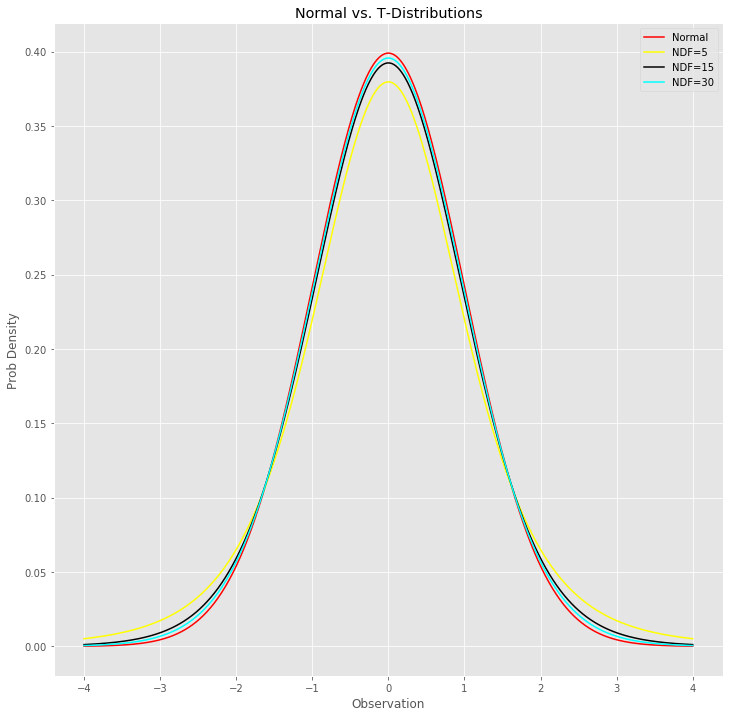

In [14]:
from scipy.stats import norm, t

x = np.linspace(-4, 4, 1000)
y_norm = norm.pdf(x, 0, 1)
t_5 = t.pdf(x, 5)
t_15 = t.pdf(x, 15)
t_30 = t.pdf(x, 30)
fig, ax = plt.subplots(1, 1, figsize=(12,12))
ax.plot(x, y_norm, color='red', label='Normal')
ax.plot(x, t_5, color='yellow', label='NDF=5')
ax.plot(x, t_15, color='black', label='NDF=15')
ax.plot(x, t_30, color='cyan', label='NDF=30')
ax.set_title("Normal vs. T-Distributions")
ax.set_ylabel("Prob Density")
ax.set_xlabel("Observation")
ax.legend(loc='upper right')
plt.show()